In [341]:
import importlib
import datamanip
importlib.reload(datamanip)

<module 'datamanip' (namespace)>

In [342]:
import torch
from filepath import *
from datamanip.plots import generate_matrix, generate_metrics
from models.GAT import GAT#, GCN, SimpleMPNN
from train_eval.train import train
from train_eval.evaluate import evaluate
from datamanip.datasetmanip.three_five_dataset import ThreeFiveDataset
from datamanip.datasetmanip.dataset_util import split_dataset

# Model Selection by number of 9's
### 1. Match 1-1: 0 vs. 7
### 2. Match 2-1: 0/1 vs. 2/3
### 3. Match 2-2: 4/5 vs. 6/7
### 4. Match 3-1: 0 vs. 1
### 5. Match 3-2: 2 vs. 3
### 6. Match 3-3: 4 vs. 5
### 7. Match 3-4: 6 vs. 7



In [343]:
match = "3-1"

In [344]:
if match == "1-1":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.01
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 30
    HIDDEN_DIM = 64
elif match == "2-1":
    NUM_EPOCHS = 100
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 16
elif match == "2-2":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 28
elif match == "3-1":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 82
else:
    NUM_EPOCHS = 100
    DROPOUT_RATE = 0.2
    LEARNING_RATE = 0.0007
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 64

In [345]:
#Create list of Data objects, each containing the node features, edge indices, and target values
data_list = ThreeFiveDataset(root=dataset_path, match=match)

In [346]:
train_loader, val_loader, test_loader = split_dataset(data_list)

In [347]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GAT(input_dim=NODE_FEATURES, hidden_dim=HIDDEN_DIM, output_dim=2, dropout_rate=DROPOUT_RATE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = torch.nn.CrossEntropyLoss()

In [348]:
train_config = {
    "num_epochs": NUM_EPOCHS,
    "patience": PATIENCE,
    "device": device,
    "criterion": criterion,
    "optimizer": optimizer,
}

In [349]:
train(model, train_loader, val_loader, train_config, model_checkpoints_path + "/booster/" + match + ".pth")

Epoch 1/150, Train Loss: 0.4027
Epoch 1/150, Validation Loss: 0.3520
Best model updated based on validation loss.
Epoch 2/150, Train Loss: 0.3588
Epoch 2/150, Validation Loss: 0.3509
Best model updated based on validation loss.
Epoch 3/150, Train Loss: 0.3594
Epoch 3/150, Validation Loss: 0.3456
Best model updated based on validation loss.
Epoch 4/150, Train Loss: 0.3568
Epoch 4/150, Validation Loss: 0.3649
No improvement in validation loss for 1 epoch(s).
Epoch 5/150, Train Loss: 0.3536
Epoch 5/150, Validation Loss: 0.3467
No improvement in validation loss for 2 epoch(s).
Epoch 6/150, Train Loss: 0.3511
Epoch 6/150, Validation Loss: 0.3673
No improvement in validation loss for 3 epoch(s).
Epoch 7/150, Train Loss: 0.3421
Epoch 7/150, Validation Loss: 0.3811
No improvement in validation loss for 4 epoch(s).
Epoch 8/150, Train Loss: 0.3455
Epoch 8/150, Validation Loss: 0.3679
No improvement in validation loss for 5 epoch(s).
Epoch 9/150, Train Loss: 0.3352
Epoch 9/150, Validation Loss: 0

([0.40269184412927966,
  0.3588006602887344,
  0.3594256382244142,
  0.35679709353289113,
  0.3535934243896026,
  0.3510619746926038,
  0.3420636910842106,
  0.345482258295471,
  0.33515730271992006,
  0.3273091243042541,
  0.318270950449314,
  0.3045615394095423,
  0.27573420912793034,
  0.2628636034315989,
  0.23915634226245372,
  0.23844060236993042,
  0.22870768037562078,
  0.2400639007317101,
  0.21851550491725502,
  0.23117601786088565,
  0.2253144591928942,
  0.21786416222234606,
  0.22117858623769207,
  0.2256104111553652,
  0.21022267339257855,
  0.21676304920948306,
  0.20936177762247357,
  0.21176676673763117,
  0.20894684171370367,
  0.21047490564259616,
  0.21047919847277313,
  0.211329115260201,
  0.21582322264745418,
  0.21714586924334525,
  0.2166086454459801,
  0.21044203574242798,
  0.20613684631118426,
  0.20632483824910855],
 [0.35201682525097266,
  0.35092702856254293,
  0.3456284312101511,
  0.36493573761021597,
  0.3467125838853904,
  0.36734153233336275,
  0.381

In [350]:
# Load the best model after training
model.load_state_dict(torch.load(model_checkpoints_path + "/booster/" + match + ".pth", weights_only=True))

<All keys matched successfully>

In [351]:
true_values, predicted_values, accuracy = evaluate(device, model, test_loader, model_checkpoints_path + "/booster/" + match + ".pth")

GAT(
  (conv1): GATConv(10, 82, heads=1)
  (bn1): BatchNorm1d(82, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): GATConv(82, 41, heads=1)
  (bn2): BatchNorm1d(41, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=41, out_features=2, bias=True)
)
[np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
Accuracy: 0.9280


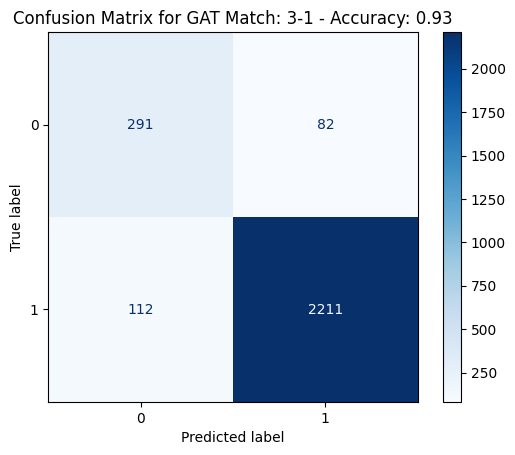

In [352]:
generate_matrix(true_values, predicted_values, accuracy, "GAT Match: "  + match)

In [353]:
generate_metrics(true_values, predicted_values, match, model_checkpoints_path, NUM_EPOCHS, LEARNING_RATE, NODE_FEATURES, DROPOUT_RATE, PATIENCE, HIDDEN_DIM)

Precision: 0.9642
Recall: 0.9518
F1 Score: 0.9580
AUROC: 0.8660
Accuracy: 0.9280
Metrics saved to /Users/einar/Documents/EDISS/Period 1/DIE/ADES-reliability-estimation/src/../models/booster/results/3-1.csv
